In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#Read files:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [38]:
# Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print data.head(5)
print train.shape, test.shape, data.shape

  Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.000000        19.20   
4              Household         0.000000         8.93   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       1999            OUT049               Tier 1   
1                       2009            OUT018               Tier 3   
2                       1999       

In [39]:
# checking which columns contain missing values.
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [40]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [41]:
# Some observations:
#Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
#Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, 
#if we can convert them to how old the particular store is, it should have a better impact on sales.
#The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

In [42]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [43]:
# #Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source']

In [44]:
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [45]:
#Print frequency of categories
for col in categorical_columns:
    print '\nFrequency of Categories for variable %s'%col
    print data[col].value_counts()


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int6

In [46]:
#The output gives us following observations:
#Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
#Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
#Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

In [47]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

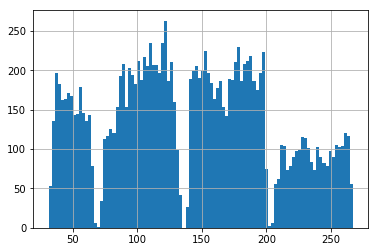

In [13]:
data['Item_MRP'].hist(bins=100)
plt.show()

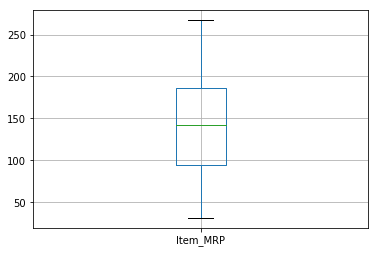

In [14]:
data.boxplot(column= 'Item_MRP')
plt.show()

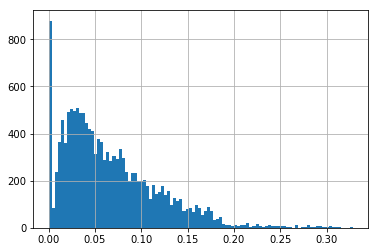

In [15]:
data['Item_Visibility'].hist(bins=100)
plt.show()

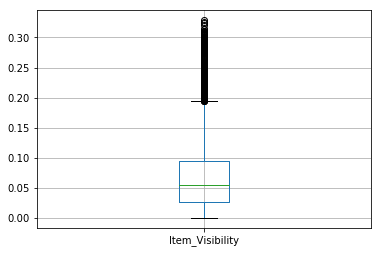

In [16]:
data.boxplot(column= 'Item_Visibility')
plt.show()

In [17]:
data['Item_Visibility'].isnull().value_counts()

False    14204
Name: Item_Visibility, dtype: int64

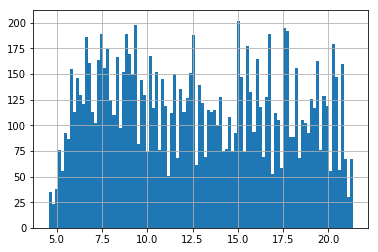

In [18]:
data['Item_Weight'].hist(bins=100)
plt.show()

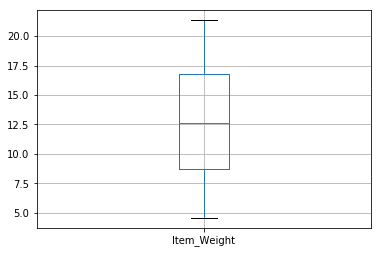

In [19]:
data.boxplot(column= 'Item_Weight')
plt.show()

In [20]:
data['Item_Weight'].isnull().value_counts()

False    11765
True      2439
Name: Item_Weight, dtype: int64

In [56]:
# data['Item_Identifier'].str.strip()

In [57]:
#Imputing Missing Values
# We found two variables with missing values – Item_Weight and Outlet_Size. 
#Lets impute the former by the average weight of the particular item. 

In [58]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight.head(5)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [60]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 
miss_bool.value_counts()

False    11765
True      2439
Name: Item_Weight, dtype: int64

In [61]:
#Impute data and check #missing values before and after imputation to confirm
print 'Orignal #missing: %d'% sum(miss_bool)

Orignal #missing: 2439


In [73]:
#data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x])
#print 'Final #missing: %d'% sum(data['Item_Weight'].isnull())

In [74]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
print 'Mode for each Outlet_Type:'
print outlet_size_mode

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print '\nOrignal #missing: %d'% sum(miss_bool)

data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print sum(data['Outlet_Size'].isnull())

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 0
0


In [75]:
# Feature Engineering

In [76]:
#Step 1: Consider combining Outlet_Type
#During exploration, we decided to consider combining the Supermarket Type2 and Type3 variables. 
#But is that a good idea? A quick way to check that could be to analyze the mean sales by type of store.
#If they have similar sales, then keeping them separate won’t help much.

data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [77]:
# This shows significant difference between them and we’ll leave them as it is

In [78]:
# Step 2: Modify Item_Visibility
#We noticed that the minimum value here is 0, which makes no practical sense. 
#Lets consider it like missing information and impute it with mean visibility of that product.

#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print 'Number of 0 values initially: %d'%sum(miss_bool)
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print 'Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0)

Number of 0 values initially: 879


KeyError: 'FDX07'